In [1]:
# основной ROS пакет
import rospy

# пакет для работы с BAG файлами
import rosbag

import os
import cv2
import numpy as np

# пакет для преобразования изображений в ROS сообщения и обратно
import cv_bridge

# функция извлечения облаков точек
from sensor_msgs.point_cloud2 import read_points

# тип сообщения для изображений
from sensor_msgs.msg import Image

# тип сообщений для облаков точек
from sensor_msgs.msg import PointCloud2

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib inline
%matplotlib notebook

In [2]:
BAG_PATH = '/home/ivb/Datasets/Carla/town07/BAG/town07.bag'
IMAGE_TOPIC = '/carla/ego_vehicle/camera_left/image'
LIDAR_TOPIC = '/carla/ego_vehicle/os64central/sensor'

## Чтение изображений с камеры

In [3]:
br = cv_bridge.CvBridge()

In [4]:
with rosbag.Bag(BAG_PATH, 'r') as bag:
    for i, (topic_name, image_msg, t) in enumerate(bag.read_messages(topics=[IMAGE_TOPIC])):
        image = br.imgmsg_to_cv2(image_msg, 'rgb8')
        break

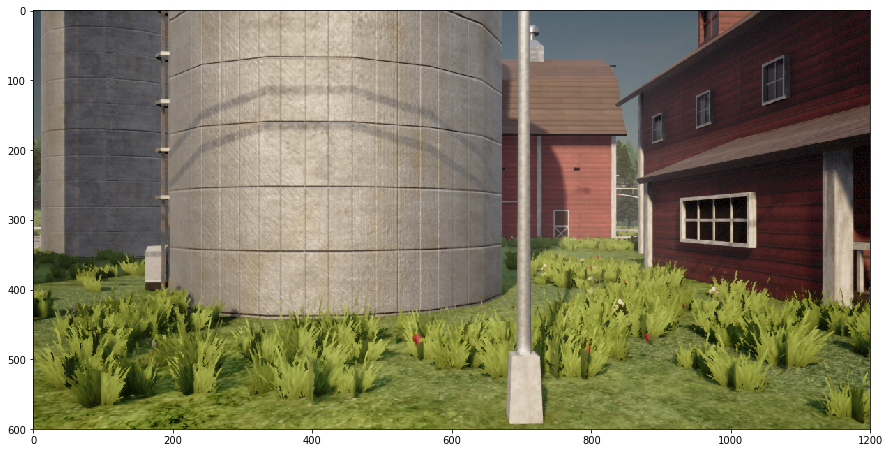

In [5]:
plt.figure(figsize=[15, 10])
plt.imshow(image)

## Чтение облаков точек лидара

In [6]:
with rosbag.Bag(BAG_PATH, 'r') as bag:
    for i, (topic_name, pc2_msg, t) in enumerate(bag.read_messages(topics=[LIDAR_TOPIC])):
        pc = np.array(list(read_points(pc2_msg)))
        break

In [7]:
pc.shape

(11312, 4)

<IPython.core.display.Javascript object>


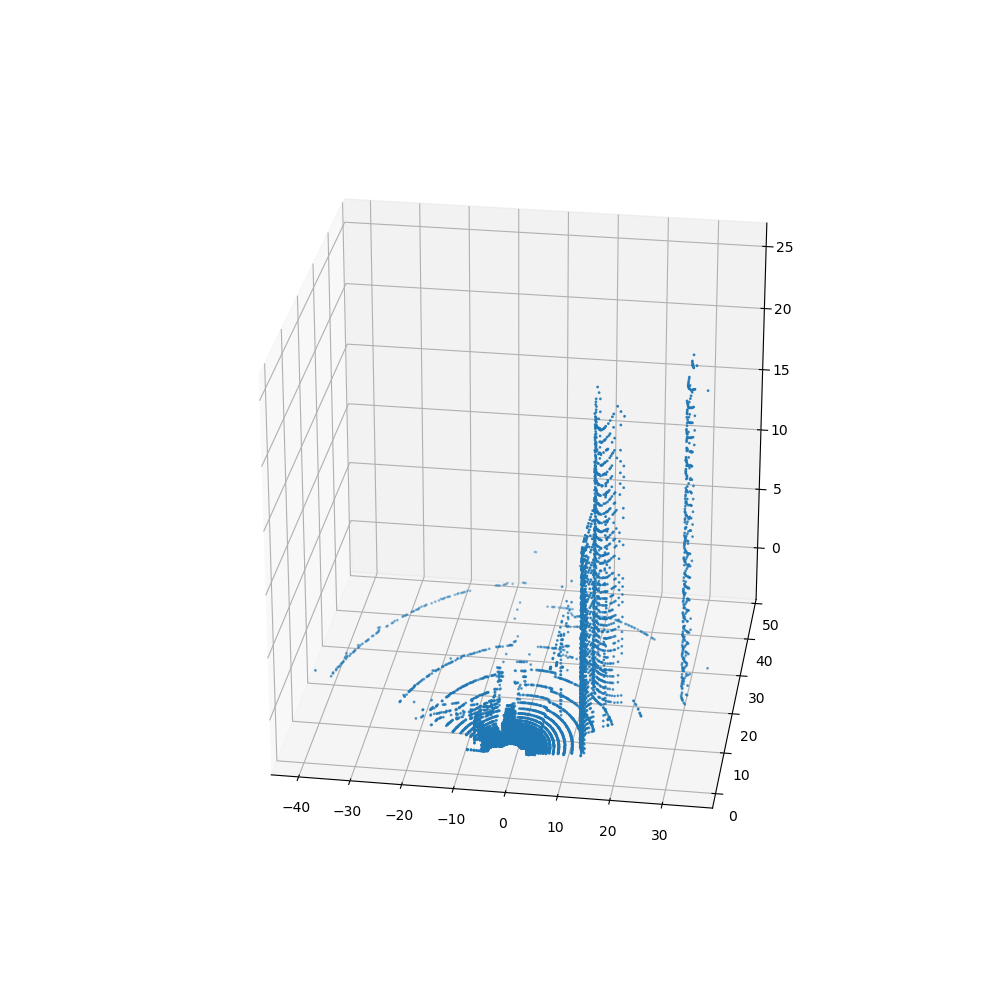

In [8]:
%matplotlib widget

fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[:, 0], pc[:, 1], pc[:, 2], s=1)